In [37]:
#Importing libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [38]:
#Chat path
chat_txt = "WhatsApp Chats/WhatsApp Chat with Sara.txt"

In [39]:
#Getting the text file using open function and splitting every line in a list named content
with open(chat_txt, "r+",encoding="utf-8") as f:
    content = f.read().splitlines()

In [40]:
content[:5]

['21/12/2016, 3:13 pm - Sara: <Media omitted>',
 '21/12/2016, 3:14 pm - Sara: <Media omitted>',
 '21/12/2016, 3:14 pm - Sara: <Media omitted>',
 '21/12/2016, 3:14 pm - Sara: <Media omitted>',
 '21/12/2016, 3:14 pm - Sara: <Media omitted>']

In [41]:
y = '21/12/2016, 3:13 pm - Hisham: <Media omitted>'
y1 = y.replace(' - ',',')
y2 = y1.replace(': ',',')
y3 = y2.split(',')
y3

['21/12/2016', ' 3:13 pm', 'Hisham', '<Media omitted>']

In [42]:
len(y.replace(' - ',',').replace(': ',',').split(','))

4

Every line contains 4 columns date, time, user, and the message so we have to check if every line contains those four columns, if not then its a multi line message.

In [43]:
def check_length(x):
    return len(x.replace(' - ',',').replace(': ',',').split(','))

In [44]:
date = []
time = []
user = []
message = []
count = 1
for x in range(len(content)):
        #If the first message isn't right then maybe it's just a message from whatsapp like 'Messages and calls are end-to-end encrypted.'
        # so we don't have to worry about it
        if check_length(content[x]) != 4 and x==0:
                continue

        elif check_length(content[x]) != 4:
                #If it's a multi line message we will add the message to the last element in message list until it gets all the lines
                message[(len(message)-1)-count] = message[(len(message)-1)-count] + content[x]
                count += 1
                continue  
        date.append(content[x][:content[x].index(',')])
        time.append((content[x][content[x].index(',')+len(','):content[x].index('-')]).strip())
        user.append((content[x][content[x].index('- ')+len('- '):content[x].index(': ')]).strip())
        message.append(content[x][content[x].index(': ')+1:].strip())
        count = 1

In [45]:
#All have the same length which a good thing
len(message), len(date), len(user), len(time)

(7569, 7569, 7569, 7569)

In [46]:
chat_dic = {'Date':date,
            'Time':time,
            'User':user,
            'Message':message}

In [47]:
#Converting the dictionary to a pandas dataframe
df = pd.DataFrame(chat_dic)

In [48]:
#Viewing the first 8 rows
df.head(8)

,Date,Time,User,Message
0,21/12/2016,3:13 pm,Sara,<Media omitted>
1,21/12/2016,3:14 pm,Sara,<Media omitted>
2,21/12/2016,3:14 pm,Sara,<Media omitted>
3,21/12/2016,3:14 pm,Sara,<Media omitted>
4,21/12/2016,3:14 pm,Sara,<Media omitted>
5,21/12/2016,3:14 pm,Sara,<Media omitted>
6,21/12/2016,3:56 pm,Sara,<Media omitted>
7,21/12/2016,8:42 pm,Sara,اطلع من حمام ي حيوان


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7569 entries, 0 to 7568
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     7569 non-null   object
 1   Time     7569 non-null   object
 2   User     7569 non-null   object
 3   Message  7569 non-null   object
dtypes: object(4)
memory usage: 236.7+ KB


In [50]:
#Converting columns to its correct type
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Time'].apply(lambda x : pd.to_datetime(x).strftime('%H:%M'))
#Replacing Media omitted value
df['Message'] = df['Message'].replace('<Media omitted>','Image or Video')

In [51]:
#Adding date and time columns
df['Day'] = df['Date'].apply(lambda x:x.day_name())
df['Month'] = df['Date'].apply(lambda x:x.month_name())
df['Year'] = df['Date'].apply(lambda x:x.year)
df['Hour'] = df['Time'].apply(lambda x:x[:2])

In [52]:
df.head()

,Date,Time,User,Message,Day,Month,Year,Hour
0,2016-12-21,15:13,Sara,Image or Video,Wednesday,December,2016,15
1,2016-12-21,15:14,Sara,Image or Video,Wednesday,December,2016,15
2,2016-12-21,15:14,Sara,Image or Video,Wednesday,December,2016,15
3,2016-12-21,15:14,Sara,Image or Video,Wednesday,December,2016,15
4,2016-12-21,15:14,Sara,Image or Video,Wednesday,December,2016,15


In [53]:
print("Total Messages",len(df['Message']))

Total Messages 7569


In [54]:
df.groupby('Date').agg({'Message':'count'}).sort_values(by='Message',ascending=False)[:4]

,Message
Date,
2020-09-16,217
2021-12-08,147
2021-07-21,99
2022-11-01,87


In [55]:
df_date=df.groupby('Date').agg({'Message':'count'}).reset_index()

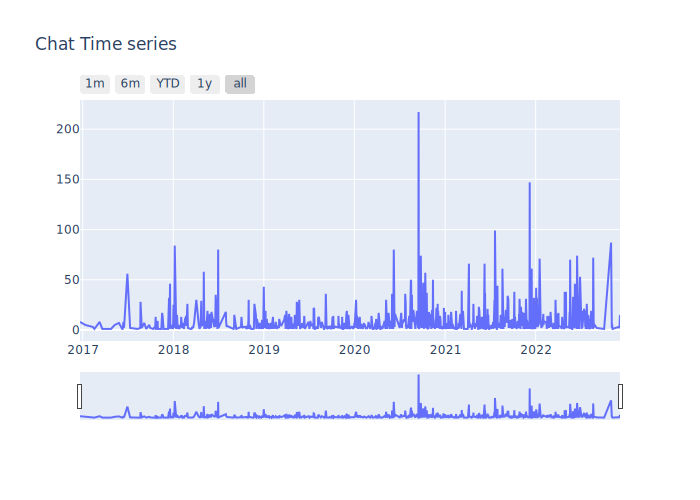

In [77]:
fig = go.Figure()
fig.add_trace(
    go.Line(x=df_date.Date, y=df_date.Message))

# Set title
fig.update_layout(
    title_text="Chat Time series"
)
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show("svg")

In [57]:
df['User'].value_counts()

Sara      4277
Hisham    3292
Name: User, dtype: int64

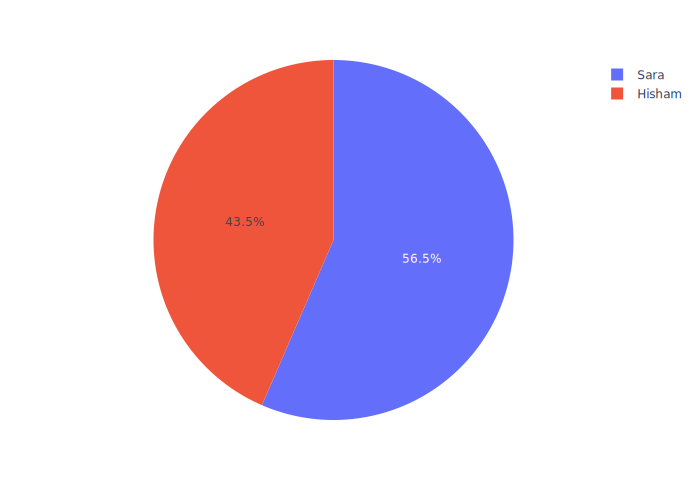

In [76]:
fig = px.pie(df, values=df['User'].value_counts().values, names=df['User'].value_counts().index)
fig.show("svg")

In [59]:
df.groupby('Day').agg({'Message':'count'}).sort_values(by='Message',ascending=False)

,Message
Day,
Wednesday,1531
Friday,1254
Monday,1166
Tuesday,1064
Sunday,948
Thursday,878
Saturday,728


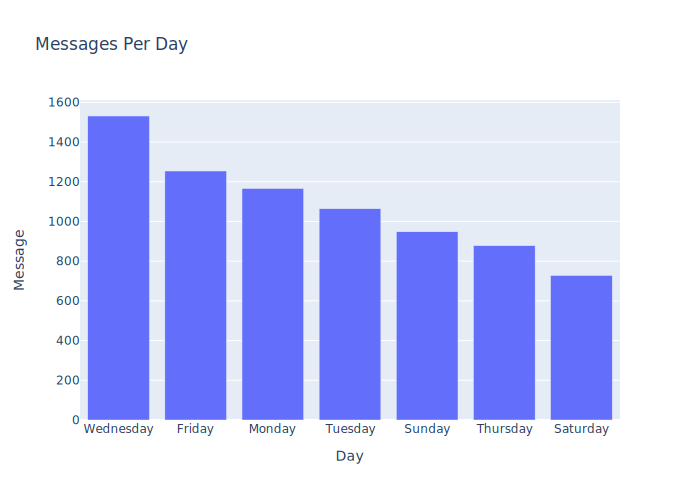

In [75]:
df_day = df.groupby('Day').agg({'Message':'count'}).sort_values(by='Message',ascending=False).reset_index()
fig = px.bar(df_day, x='Day', y='Message',title='Messages Per Day')
fig.show("svg")

In [61]:
df.groupby('Month').agg({'Message':'count'}).sort_values(by='Message',ascending=False)

,Message
Month,
June,878
August,785
September,728
May,717
December,714
January,682
July,664
November,645
October,600


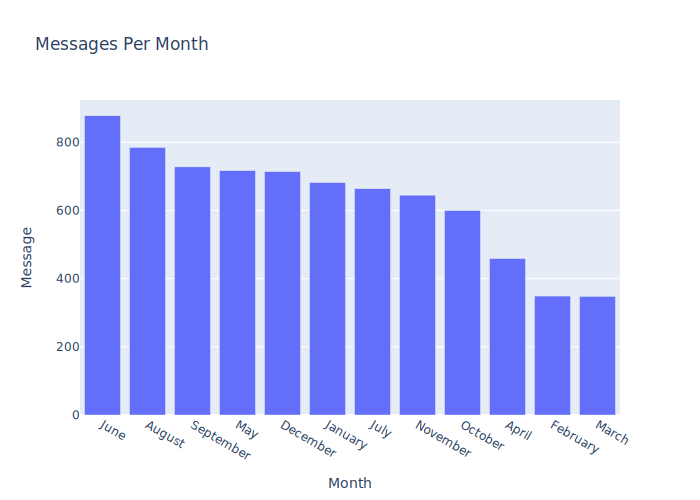

In [74]:
df_month = df.groupby('Month').agg({'Message':'count'}).sort_values(by='Message',ascending=False).reset_index()
fig = px.bar(df_month, x='Month', y='Message', title='Messages Per Month')
fig.show("svg")

In [63]:
df.groupby('Hour').agg({'Message':'count'}).sort_values(by='Message',ascending=False)[:10]

,Message
Hour,
22,791
00,704
23,702
15,530
20,514
16,477
19,459
18,452
17,451


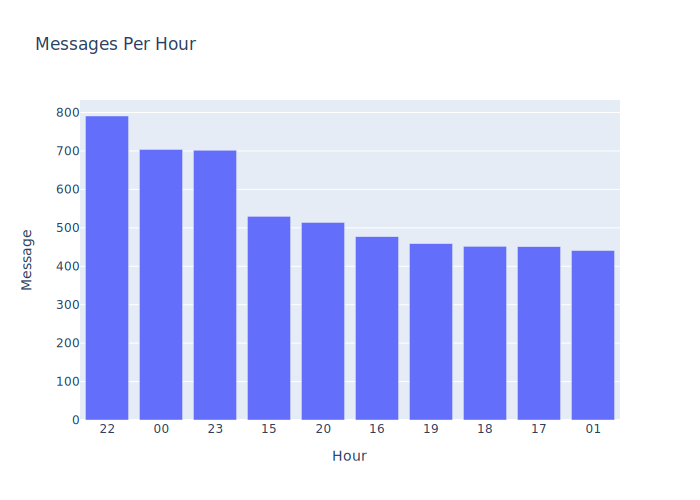

In [73]:
df_hour = df.groupby('Hour').agg({'Message':'count'}).sort_values(by='Message',ascending=False)[:10].reset_index()
fig = px.bar(df_hour, x='Hour', y='Message', title='Messages Per Hour')
fig.show("svg")

In [65]:
df['Message'].describe()

count               7569
unique              4448
top       Image or Video
freq                2536
Name: Message, dtype: object

In [66]:
#Getting arabic stop words to remove them from the messages
with open('arabicstopwords.txt', "r+",encoding="utf-8") as s:
    stopwords = s.read().splitlines() 

In [67]:
stopwords[:5]

['،', 'ء', 'ءَ', 'آ', 'آب']

In [68]:
user1 = df['User'].value_counts().index[0]

In [69]:
user2 = df['User'].value_counts().index[1]

In [70]:
def most_freq_words(user):
    #Get messages from one user
    messages = (" ".join(df[(df['Message']!='Image or Video')&(df['User']==user)]['Message']).split())
    #remove stop words
    for x in messages:
       if x in stopwords: 
           messages.remove(x)

    return Counter(messages).most_common(7)

In [71]:
print('Most Frequent Words by',user1)
most_freq_words(user1)

Most Frequent Words by Sara


[('عشان', 114),
 ('هشام', 80),
 ('دي', 66),
 ('بقي', 61),
 ('انا', 56),
 ('يعني', 45),
 ('مش', 45)]

In [72]:
print('Most Frequent Words by',user2)
most_freq_words(user2)

Most Frequent Words by Hisham


[('دي', 46),
 ('علشان', 36),
 ('هى', 30),
 ('ليه', 29),
 ('يعني', 28),
 ('انتِ', 27),
 ('ايه', 26)]